<a href="https://colab.research.google.com/github/lecuevasp/Borrador/blob/main/regresionlineal_desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación tenemos el siguiente set de datos con valores promedios de viviendas ocupadas por ss propietarios. Las variables del modelo son las sguientes:

Variables del modelo y su significado:

- CRIM - tasa de delincuencia per cápita por ciudad
- ZN - proporción de suelo residencial zonificado para parcelas de más de 25.000 pies cuadrados.
- INDUS - proporción de acres comerciales no minoristas por ciudad.
- CHAS - Variable ficticia del río Charles (1 si la zona linda con el río; 0 en caso contrario).
- NOX - concentración de óxidos nítricos (partes por 10 millones)
- RM - número medio de habitaciones por vivienda
- AGE - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS - distancias ponderadas a cinco centros de empleo de Boston
- RAD - índice de accesibilidad a autopistas radiales
- TAX - tipo del impuesto sobre bienes inmuebles por cada 10.000 dólares
- PTRATIO - ratio alumnos-profesor por ciudad
- B - 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
- LSTAT - % de estatus inferior de la población
- MEDV - Valor medio de las viviendas ocupadas por sus propietarios en miles de $.


Se pide realizar un modelo de regresión lineal simple y un modelo de regresiòn multiple. Junto ocn lo anterior comente lo siguiente:

- Cuál modelo presenta el menor RMS
- Interprete $R$ y $R^2$ para cada modelo.
- Interprete los resultados de los coeficientes obtenidos
- Indique si todos los coeficientes son validos para nuestro modelo de regresión



In [ ]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
y = df['medv']
X = df[['rm', 'lstat', 'chas']]

In [ ]:
# añadir constante para el intercepto beta0
X = sm.add_constant(X)

# crear el modelo con statsmodels
modelo = sm.OLS(y, X) # primer argumento es mi variable dependiente y el segundo la independiente

In [ ]:
# ajustar el modelo
resultado = modelo.fit()

# obtenger las predicciones realizadas por el modelo
y_hat = resultado.fittedvalues

In [ ]:
print(f"MSE modelo: {mse(y, resultado.fittedvalues)}")

MSE modelo: 29.4284198568874


In [ ]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     312.7
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          1.92e-114
Time:                        22:08:21   Log-Likelihood:                -1573.6
No. Observations:                 506   AIC:                             3155.
Df Residuals:                     502   BIC:                             3172.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7637      3.122     -0.245      0.8

**Agreguemos mas variables a nuestro modelo**

In [ ]:
y = df['medv']
X = df[['rm', 'lstat', 'chas','crim','indus']]

In [ ]:
# añadir constante para el intercepto beta0
X = sm.add_constant(X)

# crear el modelo con statsmodels
modelo2 = sm.OLS(y, X) # primer argumento es mi variable dependiente y el segundo la independiente

In [ ]:
# ajustar el modelo
resultado2 = modelo2.fit()

# obtenger las predicciones realizadas por el modelo
y_hat = resultado2.fittedvalues

In [ ]:
print(f"MSE modelo: {mse(y, resultado2.fittedvalues)}")

MSE modelo: 28.762585779555003


In [ ]:
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     193.5
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          2.01e-114
Time:                        22:13:15   Log-Likelihood:                -1567.8
No. Observations:                 506   AIC:                             3148.
Df Residuals:                     500   BIC:                             3173.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3978      3.137     -0.446      0.6

In [ ]:
-1.3978 + (5.0377*6.575) + (-0.5521*9.14)  + (4.1789*1) + (-0.0885*0.02729) + (-0.0641 * 7.07)

30.402181335

## Ejercicio 2

El siguieten modelo nos entrega un set de datos con variables independientes y dependiente.


Se pide realizar un modelo de regresión lineal simple y un modelo de regresiòn multiple. Junto ocn lo anterior comente lo siguiente:

- Cuál modelo presenta el menor RMS
- Interprete $R$ y $R^2$ para cada modelo.
- Interprete los resultados de los coeficientes obtenidos
- Indique si todos los coeficientes son validos para nuestro modelo de regresión



In [ ]:
file = 'https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/03%20Regression/Regresi%C3%B3n%20lineal%20simple/softdrink.csv'
df = pd.read_csv(file)

In [ ]:
df.head()

,Obs,y,x1,x2
0,1,16.68,7,560
1,2,11.50,3,220
2,3,12.03,3,340
3,4,14.88,4,80
4,5,13.75,6,150


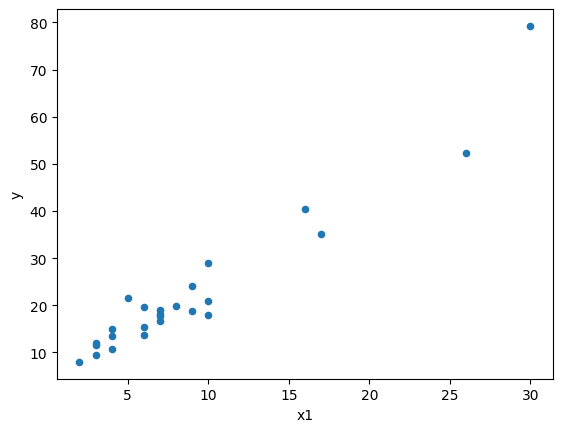

In [ ]:
df.plot(kind='scatter', x='x1', y='y');

In [ ]:
y = df["y"]
X = df["x1"]
X = sm.add_constant(X)

In [ ]:
lr = sm.OLS(y, X)
resultados_rls = lr.fit()

In [ ]:
print(f"MSE modelo Simple: {mse(y, resultados_rls.fittedvalues)}")

MSE modelo Simple: 16.085352119377763


In [ ]:
print(resultados_rls.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           8.22e-15
Time:                        23:24:57   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3208      1.371      2.422      0.0

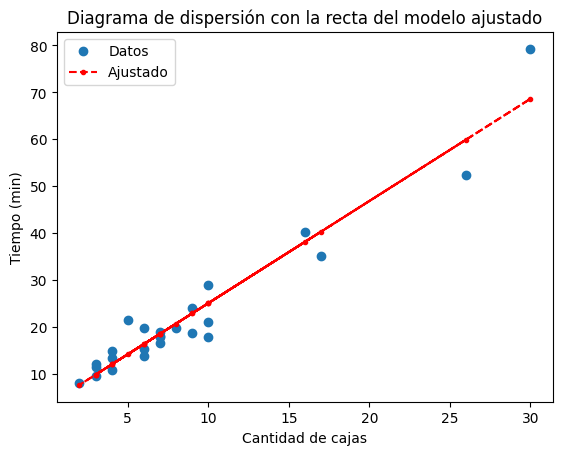

In [ ]:
import matplotlib.pyplot as plt

# Ajuste para las etiquetas del gráfico
plt.plot(df["x1"] , df["y"] , 'o', label="Datos")
# Ajuste para las etiquetas del gráfico
plt.plot(df["x1"], resultados_rls.fittedvalues, 'r--.', label="Ajustado")
# Ajustes para las leyendas del gráfico
legend = plt.legend(loc="best")
# Etiqueta del eje X
plt.xlabel('Cantidad de cajas')
# Etiqueta del eje Y
plt.ylabel('Tiempo (min)')
# Título del gráfico
plt.title('Diagrama de dispersión con la recta del modelo ajustado');

**Regresión Multiple**

In [ ]:
y = df["y"]
X = df[["x1","x2"]]
X = sm.add_constant(X)

In [ ]:
lr = sm.OLS(y, X)
resultados_rlm = lr.fit()

In [ ]:
print(f"MSE modelo Multiple: {mse(y, resultados_rlm.fittedvalues)}")

MSE modelo Multiple: 9.349267096822112


In [ ]:
print(resultados_rlm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           4.69e-16
Time:                        23:25:16   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3412      1.097      2.135      0.0

## Ejemplo 3

El siguieten modelo nos entrega un set de datos con los resultados que un estudiante obtiene en el GPA como resultado de otras mediciones, tales como TUCE, PSI,GRADE. A continuaciòn veremos que significa cada una de nuestras varaibles:

- GPA: Puntaje Promedio del estudiante
- TUCE: Puntaje en prueba económica
- PSI: Participación en programa
- GRADE: Variable dummy que indica si el estudiante aprobo o no (1,0)

Se pide realizar un modelo de regresión lineal simple y un modelo de regresiòn multiple. Junto ocn lo anterior comente lo siguiente:

- Cuál modelo presenta el menor RMS
- Interprete $R$ y $R^2$ para cada modelo.
- Interprete los resultados de los coeficientes obtenidos
- Indique si todos los coeficientes son validos para nuestro modelo de regresión

In [ ]:
datos = sm.datasets.spector.load()
df_estudios = datos.data

In [ ]:
df_estudios.head()

,GPA,TUCE,PSI,GRADE
0,2.66,20.0,0.0,0.0
1,2.89,22.0,0.0,0.0
2,3.28,24.0,0.0,0.0
3,2.92,12.0,0.0,0.0
4,4.00,21.0,0.0,1.0


In [ ]:
y = df_estudios['GPA']
X = df_estudios[['TUCE']]
X = sm.add_constant(X)

In [ ]:
lm = sm.OLS(y,X)
resultado_rls = lm.fit()

In [ ]:
print(f"MSE modelo Simple: {mse(y, resultado_rls.fittedvalues)}")

MSE modelo Simple: 0.17941285761589404


In [ ]:
print(resultado_rls.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     5.284
Date:                Sat, 15 Jun 2024   Prob (F-statistic):             0.0287
Time:                        02:55:11   Log-Likelihood:                -17.917
No. Observations:                  32   AIC:                             39.83
Df Residuals:                      30   BIC:                             42.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1016      0.449      4.686      0.0

**Modelo Multiple**

In [ ]:
y = df_estudios['GPA']
X = df_estudios[['TUCE','PSI','GRADE']]
X = sm.add_constant(X)

In [ ]:
lm = sm.OLS(y,X)
resultado_rlm = lm.fit()

In [ ]:
print(f"MSE modelo Multiple: {mse(y, resultado_rlm.fittedvalues)}")

MSE modelo Multiple: 0.13875903622787608


In [ ]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     4.860
Date:                Fri, 14 Jun 2024   Prob (F-statistic):            0.00760
Time:                        23:11:21   Log-Likelihood:                -13.806
No. Observations:                  32   AIC:                             35.61
Df Residuals:                      28   BIC:                             41.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3575      0.418      5.637      0.0